# 디시전 트리 
- 디시전 트리는, 간단하고 쉽게 결과를 분석할 수 있다. 
- 디시전 트리 내, 결과를 시각화하는 인스턴스를 제공하고 있다. 
- 실제 사용하는데 있어서, 많이 쓰이지 않는다.
- 현재는 랜덤포레스트를 많이 사용하고 있다. 
- 단,리포트 내 과정을 보여주기 위해서 디시전 트리를 사용하기도 한다. 

### 모델 및 모듈 로딩

In [2]:
import pandas as pd 
import numpy as npb
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' 

In [4]:
data = pd.read_csv('galaxy.csv')

In [5]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
BuyItNow                1485 non-null int64
startprice              1485 non-null float64
carrier                 1179 non-null object
color                   892 non-null object
productline             1485 non-null object
noDescription           1485 non-null object
charCountDescription    1485 non-null int64
upperCaseDescription    1485 non-null int64
sold                    1485 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [7]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='startprice', ylabel='Density'>

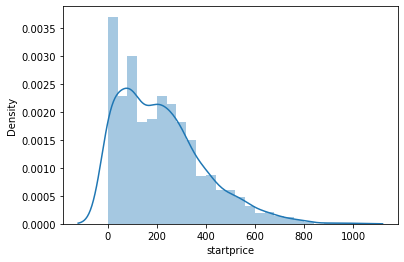

In [9]:
sns.distplot(data['startprice'])

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charCountDescription', ylabel='Density'>

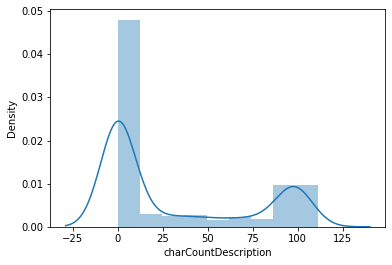

In [10]:
sns.distplot(data['charCountDescription'])

<AxesSubplot:xlabel='productline', ylabel='startprice'>

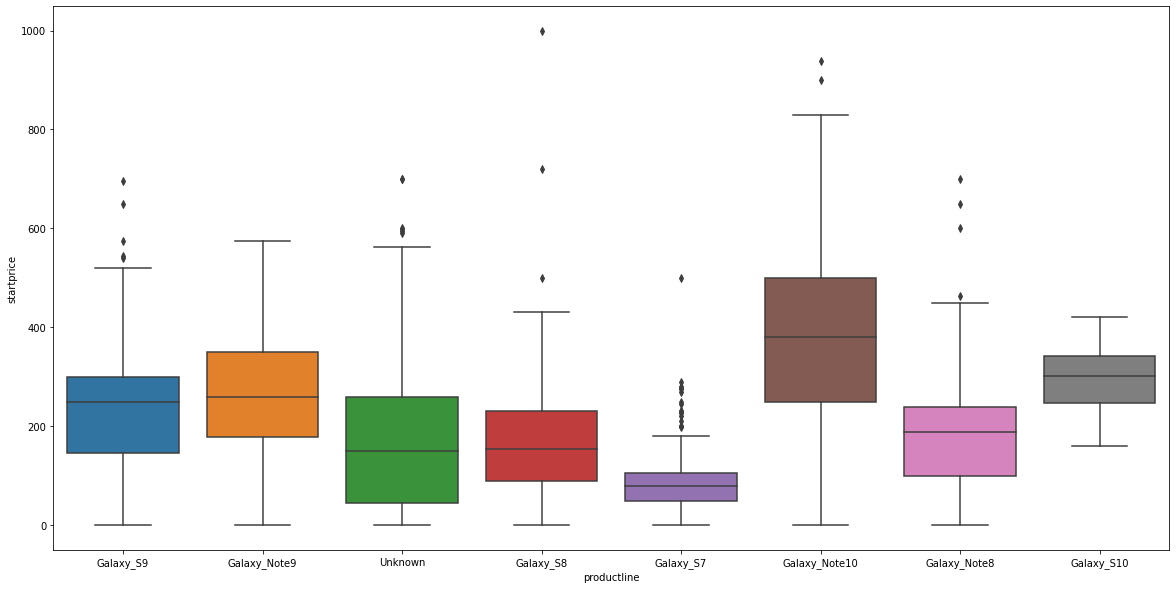

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'productline', y= 'startprice', data = data)

### MISSING VALUE  처리

In [13]:
data.isna().sum() / len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [14]:
data = data.fillna('Unknown')

In [15]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [17]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

### 카테고리 데이터 변수 처리

In [18]:
data[['carrier', 'color', 'productline', 'noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [19]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [20]:
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [21]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [22]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

### Black 종류를 하나로 통합하는 작업

In [27]:
def toblack(x):
    if x == 'Midnight Black':
        return 'Black'
    elif x == 'Aura Black':
        return 'Black'
    elif x == 'Prism Black':
        return 'Black'
    else:
        return x 

In [25]:
def black(x):
    if (x == 'Midnight Black') | (x == 'Aura Black') | (x == 'Prism Black'):
        return 'Black'
    else:
        return x

In [29]:
data['color'].apply(lambda x: black(x))

0            White
1          Unknown
2          Unknown
3       Space Gray
4       Space Gray
           ...    
1480       Unknown
1481         Black
1482    Space Gray
1483         Black
1484         Black
Name: color, Length: 1485, dtype: object

In [30]:
def pandablack(x):
    if x in ['Midnight Black', 'Aura Black', 'Prism Black']:
        return 'Black'
    else:
        return x

In [32]:
data['color'] = data['color'].apply(lambda x: pandablack(x))


In [33]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [35]:
data = pd.get_dummies(data, columns=['carrier', 'color', 'productline', 'noDescription'])

In [36]:
data.head()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,235.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,199.99,100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,175.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,100.00,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Decision_Tree MODEL 만들기

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [40]:
X = data.drop('sold', axis = 1)
y = data['sold']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [43]:
model = DecisionTreeClassifier(max_depth=10) ## max_depth : 가지치기의 길이

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
pred = model.predict(X_test)

In [51]:
pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int6

In [47]:
y_test

258     1
57      0
225     1
704     0
1096    0
       ..
44      0
1399    1
1035    0
259     1
532     1
Name: sold, Length: 297, dtype: int64

### 평가 

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
accuracy_score(y_test, pred)

0.7542087542087542

### 최적의 MAxDepth 찾기 

In [57]:
depth_range = range(2,31)
for i in depth_range:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i,'번째 acc :', round(accuracy_score(y_test, pred),3))

2 번째 acc : 0.818
3 번째 acc : 0.832
4 번째 acc : 0.832
5 번째 acc : 0.825
6 번째 acc : 0.808
7 번째 acc : 0.818
8 번째 acc : 0.801
9 번째 acc : 0.811
10 번째 acc : 0.788
11 번째 acc : 0.795
12 번째 acc : 0.781
13 번째 acc : 0.771
14 번째 acc : 0.768
15 번째 acc : 0.768
16 번째 acc : 0.761
17 번째 acc : 0.758
18 번째 acc : 0.761
19 번째 acc : 0.717
20 번째 acc : 0.771
21 번째 acc : 0.761
22 번째 acc : 0.751
23 번째 acc : 0.737
24 번째 acc : 0.754
25 번째 acc : 0.754
26 번째 acc : 0.758
27 번째 acc : 0.758
28 번째 acc : 0.747
29 번째 acc : 0.751
30 번째 acc : 0.761


In [59]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(round(accuracy_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

1.0
[[151  10]
 [ 40  96]]


In [60]:
from sklearn.tree import plot_tree

[Text(558.0, 713.475, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(279.0, 509.625, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(139.5, 305.775, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(69.75, 101.92499999999995, '0.43\n230\n[158, 72]'),
 Text(209.25, 101.92499999999995, '0.42\n10\n[3, 7]'),
 Text(418.5, 305.775, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(348.75, 101.92499999999995, '0.319\n367\n[294, 73]'),
 Text(488.25, 101.92499999999995, '0.038\n52\n[51, 1]'),
 Text(837.0, 509.625, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(697.5, 305.775, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(627.75, 101.92499999999995, '0.108\n210\n[12, 198]'),
 Text(767.25, 101.92499999999995, '0.362\n122\n[29, 93]'),
 Text(976.5, 305.775, 'productline_Galaxy_Note10 <= 0.5\n0.497\n197\n[91, 106]'),
 Text(906.75, 101.92499999999995, '0.495\n125\n[69, 56]'),
 Text(1046.25, 101.92499999999995, '0.424\n72\n[22, 50]')]

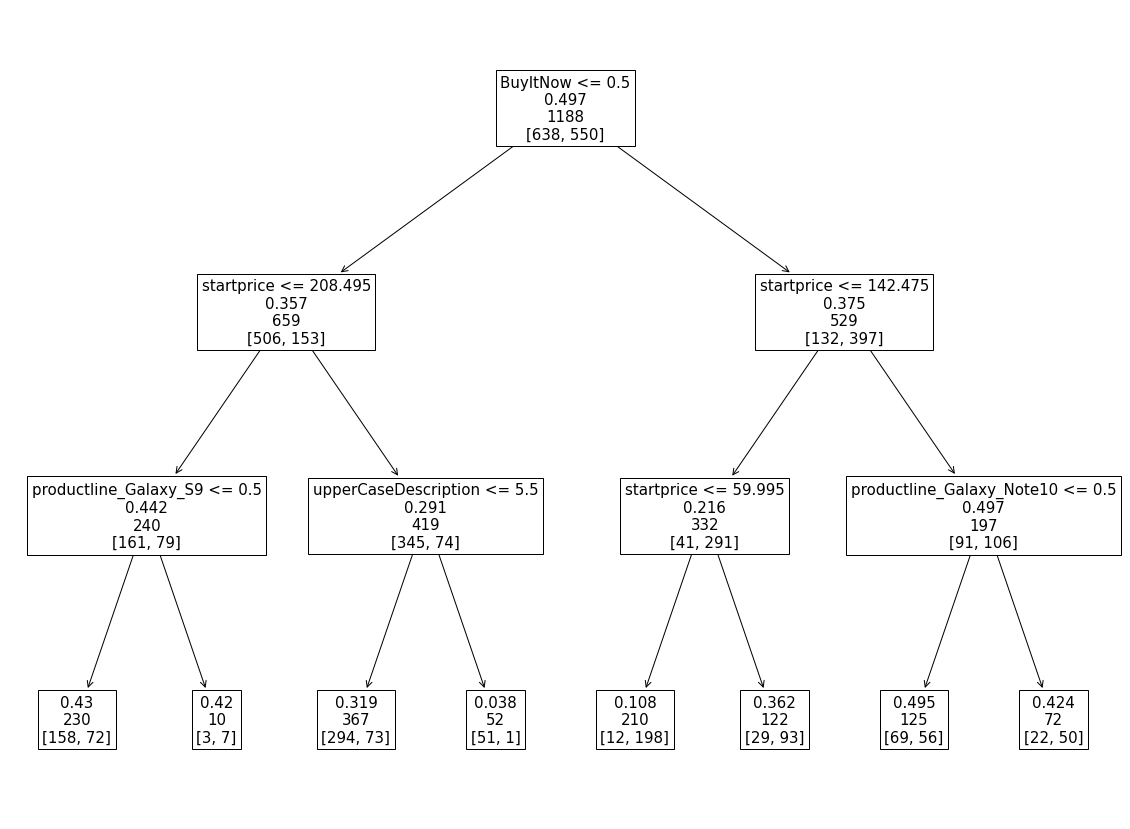

In [61]:
plt.figure(figsize = (20,15))
plot_tree(model, feature_names=X_train.columns, fontsize = 15, label = 'None', max_depth = 3)